In [2]:
import argparse
import pandas as pd
import numpy as np
import mylib.data_preprocessing as dpp

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.utils import np_utils, plot_model
from keras.models import load_model

from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.layers import LeakyReLU

from enum import Enum
import matplotlib.pyplot as plt
from keras.callbacks import Callback, ModelCheckpoint
import itertools
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.
/home/thanhdat/anaconda3/envs/py3.6a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/thanhdat/anaconda3/envs/py3.6a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/thanhdat/anaconda3/envs/py3.6a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/thanhdat

In [3]:
raw_data = pd.read_csv('train_16.csv', header=0) #train #skeleton_raw
dataset = raw_data.values
X = dataset[:, 0:20].astype(float)
Y = dataset[:, 20]
dataset.shape[0]

12800

In [3]:
print(X[0])
print(X[0][0])
for i in range(X.shape[0]):
    for n in range(20):
        if (n%2) == 0:
            X[i][n] = X[i][n] * 720
        else:
            X[i][n] = X[i][n] * 640

[0.53703704 0.19565217 0.51851852 0.34782609 0.44444444 0.32608696
 0.31481481 0.30434783 0.40740741 0.19565217 0.61111111 0.34782609
 0.64814815 0.5        0.59259259 0.60869565 0.46296296 0.65217391
 0.57407407 0.65217391]
0.537037037


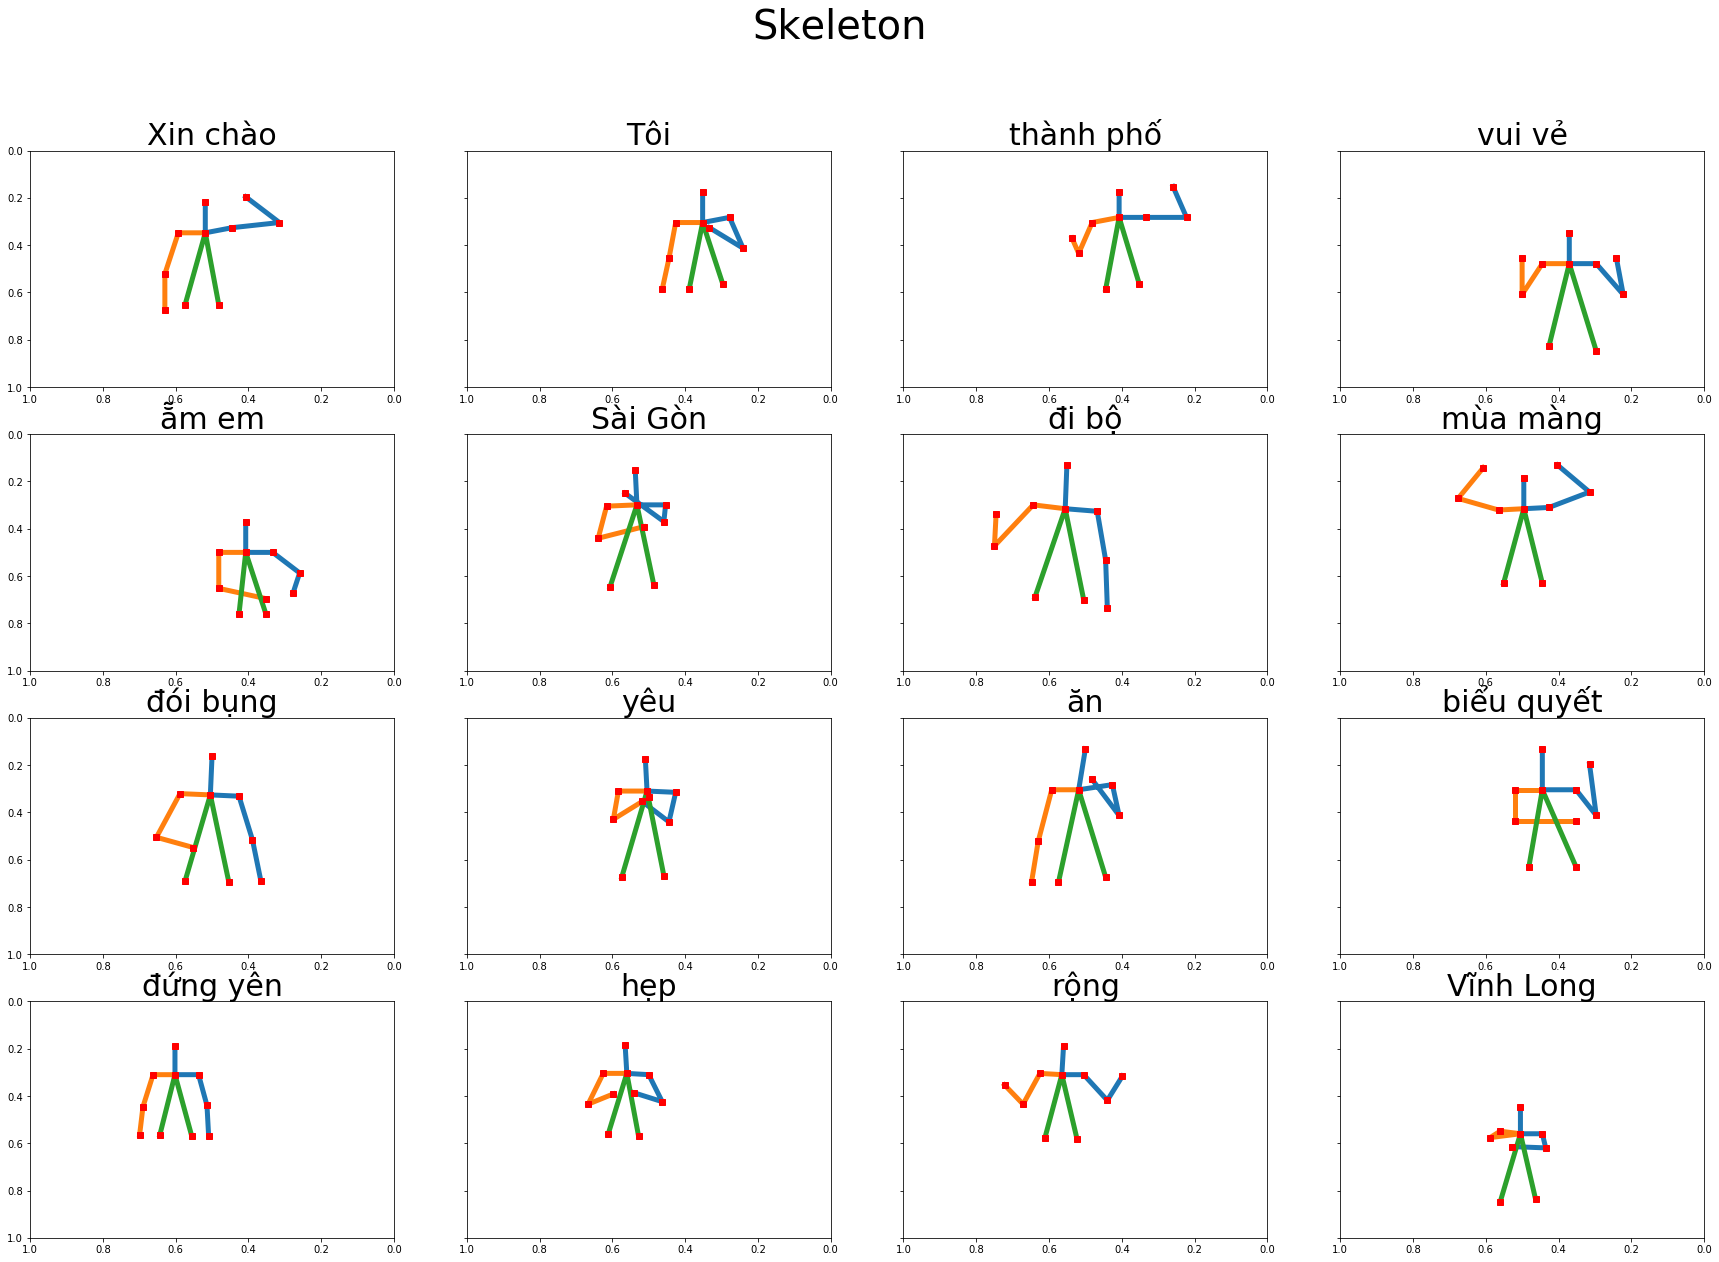

In [4]:
# Plot skeleton
df = pd.read_csv('train_16.csv')
df.set_index('class', inplace=True)
class_names = ['Xin chào', 'Tôi', 'thành phố', 'vui vẻ', 'ẵm em', 'Sài Gòn', 
               'đi bộ', 'mùa màng', 'đói bụng', 'yêu', 'ăn', 'biểu quyết', 
               'đứng yên', 'hẹp', 'rộng', 'Vĩnh Long']

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False,
                             sharey=True, figsize=(30,20))
fig.suptitle('Skeleton', size=40)
n = 0
for x in range(4):
    for y in range(4):
        a = list(df.iloc[n*800+10])
        axes[x,y].set_title(class_names[n], size=30)
        axes[x,y].plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]], linewidth=5)
        axes[x,y].plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]], linewidth=5)
        axes[x,y].plot([a[16],a[2],a[18]], [a[17],a[3],a[19]], linewidth=5)
        axes[x,y].plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', )
        axes[x,y].axis([1, 0, 1, 0])
        n+=1
plt.show()

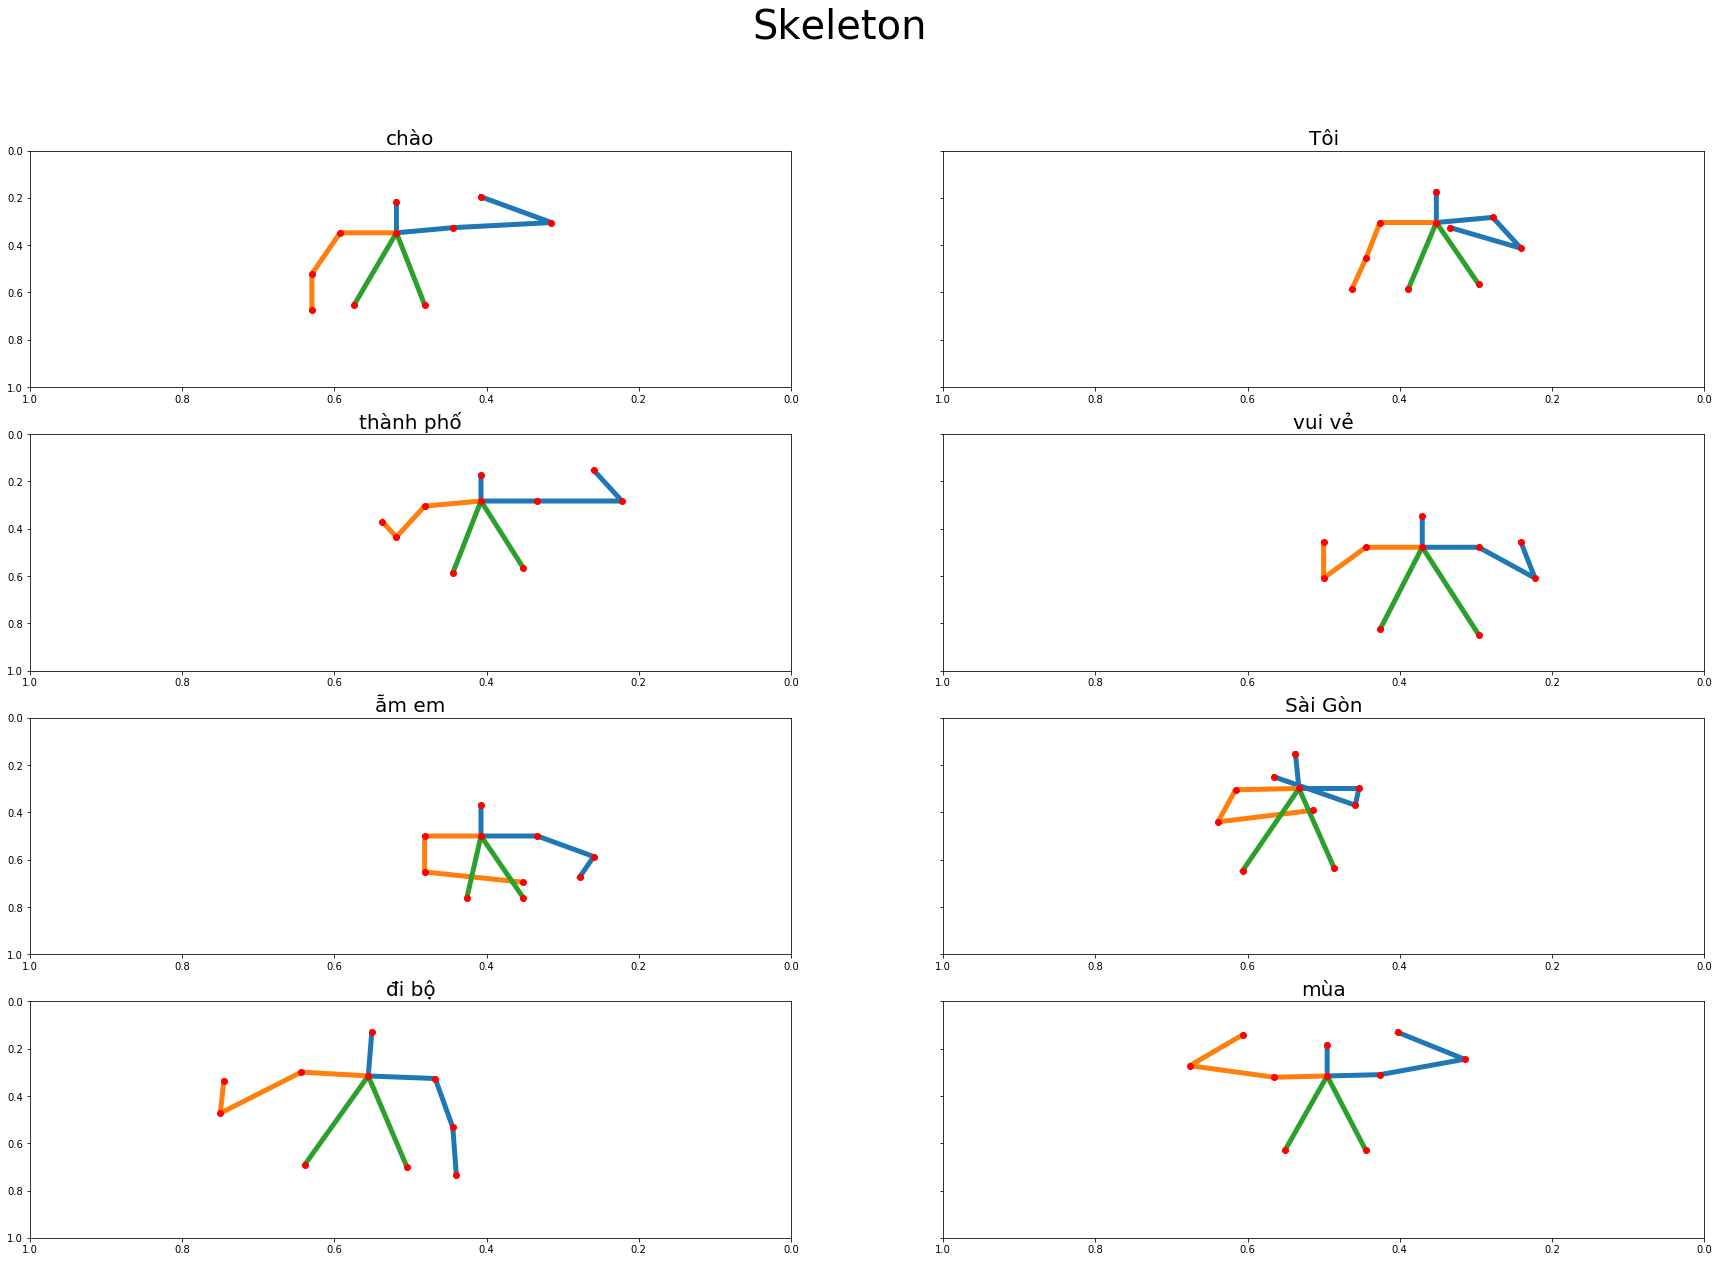

In [5]:
# Plot skeleton
df = pd.read_csv('train_16.csv')
df.set_index('class', inplace=True)
class_names = ['chào', 'Tôi', 'thành phố', 'vui vẻ', 'ẵm em', 'Sài Gòn', 'đi bộ', 
               'mùa', 'đói bụng', 'yêu', 'ăn', 'biểu quyết', 'đứng yên', 'hẹp', 'rộng', 'Vĩnh Long']

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                             sharey=True, figsize=(30,20))
fig.suptitle('Skeleton', size=40)
n = 0
for x in range(4):
    for y in range(2):
        a = list(df.iloc[n*800+10])
        axes[x,y].set_title(class_names[n], size=20)
        axes[x,y].plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]], linewidth=5)
        axes[x,y].plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]], linewidth=5)
        axes[x,y].plot([a[16],a[2],a[18]], [a[17],a[3],a[19]], linewidth=5)
        axes[x,y].plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]],
                 [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'ro')
        axes[x,y].axis([1, 0, 1, 0])
        n+=1
plt.show()

In [48]:
X_pp = []
for i in range(len(X)):
    print(dpp.pose_normalization(X[i]))
    X_pp.append(dpp.pose_normalization(X[i]))
X_pp = np.array(X_pp)

[0.611111111161111, 0.3333333334793651, 0.3888888888388888, 0.2857142857142857, 0.0, 0.23809523816825398, 0.27777777782777785, 0.0, 0.8888888889888891, 0.3333333334793651, 1.0, 0.6666666667396827, 0.8333333334833333, 0.9047619049079366, 0.44444444464444427, 1.0, 0.7777777779777778, 1.0]
[0.611111111161111, 0.3333333334793651, 0.3888888888388888, 0.2857142857142857, 0.0, 0.23809523816825398, 0.27777777782777785, 0.0, 0.8888888889888891, 0.3333333334793651, 1.0, 0.7142857142857143, 0.8333333334833333, 0.9047619049079366, 0.5000000001499999, 0.9523809524539683, 0.7777777779777778, 1.0]
[0.611111111161111, 0.3333333334793651, 0.3333333333333335, 0.2857142857142857, 0.0, 0.23809523816825398, 0.27777777782777785, 0.0, 0.8888888889888891, 0.3333333334793651, 1.0, 0.7142857142857143, 0.8888888889888891, 0.9523809524539683, 0.44444444464444427, 1.0, 0.7777777779777778, 1.0]
[0.6470588235480967, 0.3333333334793651, 0.4117647058076123, 0.2857142857142857, 0.0, 0.23809523816825398, 0.2941176470961

[0.5454545459008263, 0.0, 0.18181818213057857, 0.0, 0.0, 0.46153846159289924, 0.45454545459008255, 0.23076923079644981, 0.9090909091801657, 0.0, 1.0, 0.5384615384071005, 1.0, 1.0, 0.27272727295041316, 1.0, 0.727272727540496, 1.0]
[0.5454545459008263, 0.0, 0.18181818213057857, 0.0, 0.0, 0.46153846159289924, 0.45454545459008255, 0.23076923079644981, 0.9090909091801657, 0.0, 1.0, 0.5384615384071005, 1.0, 1.0, 0.27272727295041316, 0.9230769231857989, 0.727272727540496, 1.0]
[0.5454545459008263, 0.0, 0.18181818213057857, 0.0, 0.0, 0.46153846159289924, 0.45454545459008255, 0.23076923079644981, 0.9090909091801657, 0.0, 1.0, 0.5384615384071005, 1.0, 1.0, 0.27272727295041316, 1.0, 0.727272727540496, 1.0]
[0.5454545459008263, 0.0, 0.18181818213057857, 0.0, 0.0, 0.46153846159289924, 0.45454545459008255, 0.23076923079644981, 0.9090909091801657, 0.0, 1.0, 0.5384615384071005, 1.0, 0.9230769231857989, 0.27272727295041316, 1.0, 0.727272727540496, 1.0]
[0.5454545459008263, 0.0, 0.18181818213057857, 0.0

[0.600000000072, 0.4782608696, 0.39999999992799995, 0.4347826088000001, 0.0, 0.26086956520000004, 0.13333333354933333, 0.0, 0.8666666668106665, 0.5217391304, 1.0, 0.7826086956, 1.0, 0.5217391304, 0.39999999992799995, 1.0, 0.7333333332613335, 1.0]
[0.600000000072, 0.4782608696, 0.3333333333333334, 0.4347826088000001, 0.0, 0.26086956520000004, 0.13333333354933333, 0.0, 0.8666666668106665, 0.5217391304, 1.0, 0.7826086956, 1.0, 0.5652173914, 0.39999999992799995, 1.0, 0.7333333332613335, 1.0]
[0.600000000072, 0.4782608696, 0.3333333333333334, 0.4347826088000001, 0.0, 0.26086956520000004, 0.13333333354933333, 0.0, 0.8666666668106665, 0.5217391304, 1.0, 0.7826086956, 1.0, 0.5217391304, 0.39999999992799995, 1.0, 0.7333333332613335, 1.0]
[0.600000000072, 0.4782608696, 0.3333333333333334, 0.4347826088000001, 0.0, 0.26086956520000004, 0.13333333354933333, 0.0, 0.8666666668106665, 0.5217391304, 1.0, 0.7826086956, 1.0, 0.5217391304, 0.39999999992799995, 1.0, 0.7333333332613335, 1.0]
[0.600000000072

[0.5, 0.0588235293162629, 0.214285714120408, 0.0, 0.0, 0.4117647057550171, 0.0, 0.0, 0.7857142858795916, 0.0588235293162629, 0.9285714286265303, 0.47058823507128, 1.0, 0.0588235293162629, 0.214285714120408, 1.0, 0.6428571427469385, 0.9411764704131489]
[0.5, 0.0588235293162629, 0.214285714120408, 0.0588235293162629, 0.0, 0.4117647057550171, 0.07142857137346927, 0.0, 0.857142857253061, 0.0588235293162629, 0.9285714286265303, 0.47058823507128, 1.0, 0.0588235293162629, 0.214285714120408, 1.0, 0.6428571427469385, 0.9411764704131489]
[0.5, 0.0588235293162629, 0.214285714120408, 0.0, 0.0, 0.4117647057550171, 0.0, 0.0, 0.7857142858795916, 0.0588235293162629, 0.9285714286265303, 0.47058823507128, 1.0, 0.0588235293162629, 0.214285714120408, 1.0, 0.6428571427469385, 0.9411764704131489]
[0.5, 0.0, 0.214285714120408, 0.0, 0.0, 0.4117647057550171, 0.0, 0.0, 0.7857142858795916, 0.0588235293162629, 0.9285714286265303, 0.47058823507128, 1.0, 0.0588235293162629, 0.214285714120408, 1.0, 0.642857142746938

[0.6249999997046873, 0.0588235293162629, 0.3125000000210936, 0.0, 0.0, 0.47058823534186855, 0.12499999987343746, 0.8235294117806224, 1.0, 0.0588235293162629, 1.0, 0.5294117646581314, 0.4999999998312501, 0.8823529410968857, 0.3125000000210936, 1.0, 0.7499999999156248, 1.0]
[0.6249999997046873, 0.0588235293162629, 0.3125000000210936, 0.0, 0.0, 0.47058823534186855, 0.12499999987343746, 0.8235294117806224, 1.0, 0.0588235293162629, 1.0, 0.5294117646581314, 0.4999999998312501, 0.8823529410968857, 0.3125000000210936, 1.0, 0.7499999999156248, 1.0]
[0.6249999997046873, 0.0588235293162629, 0.3125000000210936, 0.0, 0.0, 0.47058823534186855, 0.12499999987343746, 0.8235294117806224, 1.0, 0.0588235293162629, 1.0, 0.5294117646581314, 0.4999999998312501, 0.8823529410968857, 0.3125000000210936, 1.0, 0.7499999999156248, 1.0]
[0.6249999997046873, 0.0588235293162629, 0.3125000000210936, 0.0, 0.0, 0.47058823534186855, 0.12499999987343746, 0.8235294117806224, 1.0, 0.0588235293162629, 1.0, 0.5294117646581314

[0.46666666663466666, 0.0, 0.044444444167111026, 0.0, 0.0, 0.3432835820731565, 0.6222222221795557, 0.10447761176814428, 0.8666666665386665, 0.0, 1.0, 0.4776119403353976, 0.3777777778204443, 0.4029850745120961, 0.20000000019199984, 1.0, 0.8000000002880002, 0.9850746268902649]
[0.45454545459008255, 0.01470588232906565, 0.022727272582231225, 0.01470588232906565, 0.0, 0.3823529410968858, 0.5909090910652893, 0.1176470586325258, 0.8636363635247933, 0.0, 1.0, 0.4705882353418684, 0.3636363637702477, 0.4117647057550171, 0.2045454547128098, 1.0, 0.7954545457780994, 1.0]
[0.45454545459008255, 0.014492753599999911, 0.022727272582231225, 0.014492753599999911, 0.0, 0.36231884053333324, 0.5909090910652893, 0.11594202879999989, 0.8636363635247933, 0.0, 1.0, 0.47826086960000014, 0.3636363637702477, 0.4057971013333333, 0.2045454547128098, 1.0, 0.8181818183603309, 0.9855072464000004]
[0.45454545459008255, 0.014925373109734814, 0.022727272582231225, 0.014925373109734814, 0.0, 0.37313432829262627, 0.613636

[0.5168539325951774, 0.3711340206244234, 0.31460674169574554, 0.38144329895929435, 0.0, 0.25773195875115323, 0.11235955055361693, 0.0, 0.6966292135295037, 0.38144329895929435, 1.0, 0.2783505154208949, 0.865168539238581, 0.010309278334870857, 0.40449438204156046, 1.0, 0.6404494381313472, 1.0]
[0.5168539325951774, 0.3711340206244234, 0.31460674169574554, 0.38144329895929435, 0.0, 0.268041237086024, 0.1011235955710643, 0.0, 0.6966292135295037, 0.3711340206244234, 1.0, 0.2783505154208949, 0.8764044942211336, 0.010309278334870857, 0.40449438204156046, 1.0, 0.6741573033217017, 1.0]
[0.5168539325951774, 0.36458333334930554, 0.31460674169574554, 0.375, 0.0, 0.2604166666506944, 0.11235955055361693, 0.0, 0.6966292135295037, 0.375, 1.0, 0.2708333333013889, 0.8764044942211336, 0.0, 0.40449438204156046, 0.9791666666986112, 0.6516853933565965, 1.0]
[0.5113636362911157, 0.3711340206244234, 0.30681818182376036, 0.38144329895929435, 0.0, 0.268041237086024, 0.10227272711095037, 0.0, 0.7045454544673552, 

[0.5555555555999998, 0.0273972602325389, 0.2222222223999999, 0.04109589034880842, 0.09259259279999998, 0.5205479451744042, 0.0, 0.9863013698837303, 0.8888888887999999, 0.0, 1.0, 0.452054794593057, 0.4444444444000002, 0.46575342470932635, 0.351851852, 1.0, 0.8518518519999998, 0.9726027397674613]
[0.5614035089447831, 0.013513513493352726, 0.2280701754851339, 0.04054054048005832, 0.1052631579745151, 0.5000000000000001, 0.0, 0.9729729730132946, 0.8771929824893814, 0.0, 1.0, 0.4459459460265886, 0.4561403509702678, 0.47297297301329433, 0.40350877198301016, 1.0, 0.8596491229532779, 0.9864864865066469]
[0.5614035085658357, 0.027777777735185145, 0.24561403502123727, 0.041666666602777645, 0.12280701751061875, 0.5277777777351851, 0.0, 1.0, 0.8947368420254845, 0.0, 1.0, 0.458333333397222, 0.4385964910552169, 0.4722222222648148, 0.3859649120679593, 0.9583333333972223, 0.8421052630382269, 0.9583333333972223]
[0.5818181816967936, 0.013888888867592502, 0.2545454545168926, 0.027777777735185145, 0.12727

[0.5102040817855891, 0.0, 0.16326530636534733, 0.015384615358485263, 0.0, 0.30769230773585804, 0.5306122449159515, 0.1538461538679291, 0.8571428572058307, 0.0, 1.0, 0.3384615384528283, 0.4897959182144107, 0.12307692315095858, 0.3061224491595166, 0.9846153846415145, 0.7959183673739275, 1.0]
[0.5102040817855891, 0.015151515126170701, 0.16326530636534733, 0.030303030252341556, 0.0, 0.3181818182071625, 0.5306122449159515, 0.16666666666666669, 0.8571428572058307, 0.0, 1.0, 0.34848484845950395, 0.4897959182144107, 0.13636363641432497, 0.28571428558833806, 1.0, 0.7755102042435651, 1.0]
[0.5102040817855891, 0.0, 0.18367346949570976, 0.015384615358485263, 0.0, 0.30769230773585804, 0.5510204080463139, 0.13846153850944368, 0.8571428572058307, 0.0, 1.0, 0.3384615384528283, 0.4693877550840483, 0.10769230779247348, 0.28571428558833806, 1.0, 0.7959183673739275, 1.0]
[0.5102040817855891, 0.015624999973046776, 0.18367346949570976, 0.03124999994609371, 0.0, 0.3281250000089844, 0.5102040817855891, 0.1718

[0.4166666667416665, 0.10000000006900002, 0.0, 0.10000000006900002, 0.0, 0.40000000004599995, 0.3333333334833331, 0.0, 0.7500000002249999, 0.14999999998849994, 0.9166666667416667, 0.599999999954, 1.0, 1.0, 0.08333333325833345, 1.0, 0.6666666669666667, 1.0]
[0.41666666674166647, 0.10000000006900002, 0.0, 0.10000000006900002, 0.0, 0.40000000004599995, 0.333333333483333, 0.0, 0.8333333334833332, 0.10000000006900002, 0.9166666667416663, 0.599999999954, 1.0, 1.0, 0.16666666651666687, 1.0, 0.6666666665166667, 1.0]
[0.41666666674166647, 0.10000000006900002, 0.0, 0.10000000006900002, 0.0, 0.40000000004599995, 0.333333333483333, 0.0, 0.7500000002249999, 0.14999999998849994, 0.9166666667416663, 0.599999999954, 1.0, 1.0, 0.16666666651666687, 0.9500000000804998, 0.6666666665166667, 1.0]
[0.41666666674166647, 0.10000000006900002, 0.0, 0.10000000006900002, 0.0, 0.40000000004599995, 0.2499999997749998, 0.0, 0.7500000002249999, 0.10000000006900002, 0.9166666667416663, 0.5500000000345, 1.0, 1.0, 0.0833

[0.5833333332583335, 0.05555555547037032, 0.25000000022499963, 0.05555555547037032, 0.0, 0.5000000000000001, 0.08333333325833345, 0.0, 1.0, 0.11111111094074064, 0.9166666667416667, 0.5000000000000001, 0.1666666665166664, 0.5000000000000001, 0.25000000022499963, 1.0, 0.833333333483333, 0.9444444442740741]
[0.5833333332583335, 0.10526315795844879, 0.25000000022499963, 0.10526315795844879, 0.0, 0.5263157895501387, 0.08333333325833345, 0.0, 1.0, 0.15789473681662047, 1.0, 0.5263157895501387, 0.25000000022499963, 0.5263157895501387, 0.25000000022499963, 1.0, 0.833333333483333, 0.9473684208997231]
[0.5833333332583335, 0.05882352933217987, 0.25000000022499963, 0.05882352933217987, 0.0, 0.5294117648013842, 0.08333333325833345, 0.0, 1.0, 0.11764705866435975, 1.0, 0.5294117648013842, 0.1666666665166664, 0.5294117648013842, 0.25000000022499963, 1.0, 0.833333333483333, 0.9411764706678202]
[0.5833333332583335, 0.05555555547037032, 0.25000000022499963, 0.05555555547037032, 0.0, 0.5000000000000001, 0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



float64


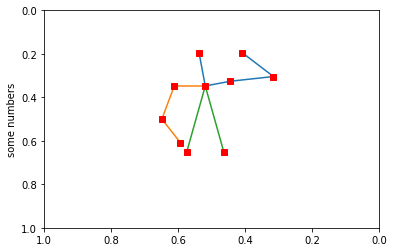

In [6]:
a = X[0]
print(a[0].dtype)
plt.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]])
plt.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]])
plt.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]])

plt.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs')

plt.axis([1, 0, 1, 0])
plt.ylabel('some numbers')
plt.show()

[0.537037037, 0.1956521739, 0.5185185185, 0.347826087, 0.44444444439999997, 0.32608695649999997, 0.3148148148, 0.3043478261, 0.40740740740000003, 0.1956521739, 0.6111111111, 0.347826087, 0.6481481481, 0.5, 0.5925925926, 0.6086956522, 0.46296296299999995, 0.6521739129999999, 0.5740740741, 0.6521739129999999]
[343.70370368000005, 140.869565208, 331.85185184, 250.43478264, 284.444444416, 234.78260867999998, 201.481481472, 219.130434792, 260.740740736, 140.869565208, 391.11111110400003, 250.43478264, 414.81481478399996, 360.0, 379.259259264, 438.260869584, 296.29629631999995, 469.56521735999996, 367.407407424, 469.56521735999996]
[343.70370368000005, 140.869565208, 331.85185184, 250.43478264, 284.444444416, 234.78260867999998, 201.481481472, 219.130434792, 260.740740736, 140.869565208, 391.11111110400003, 250.43478264, 414.81481478399996, 360.0, 379.259259264, 438.260869584, 296.29629631999995, 469.56521735999996, 367.407407424, 469.56521735999996, 331.851851872, 469.56521735999996]


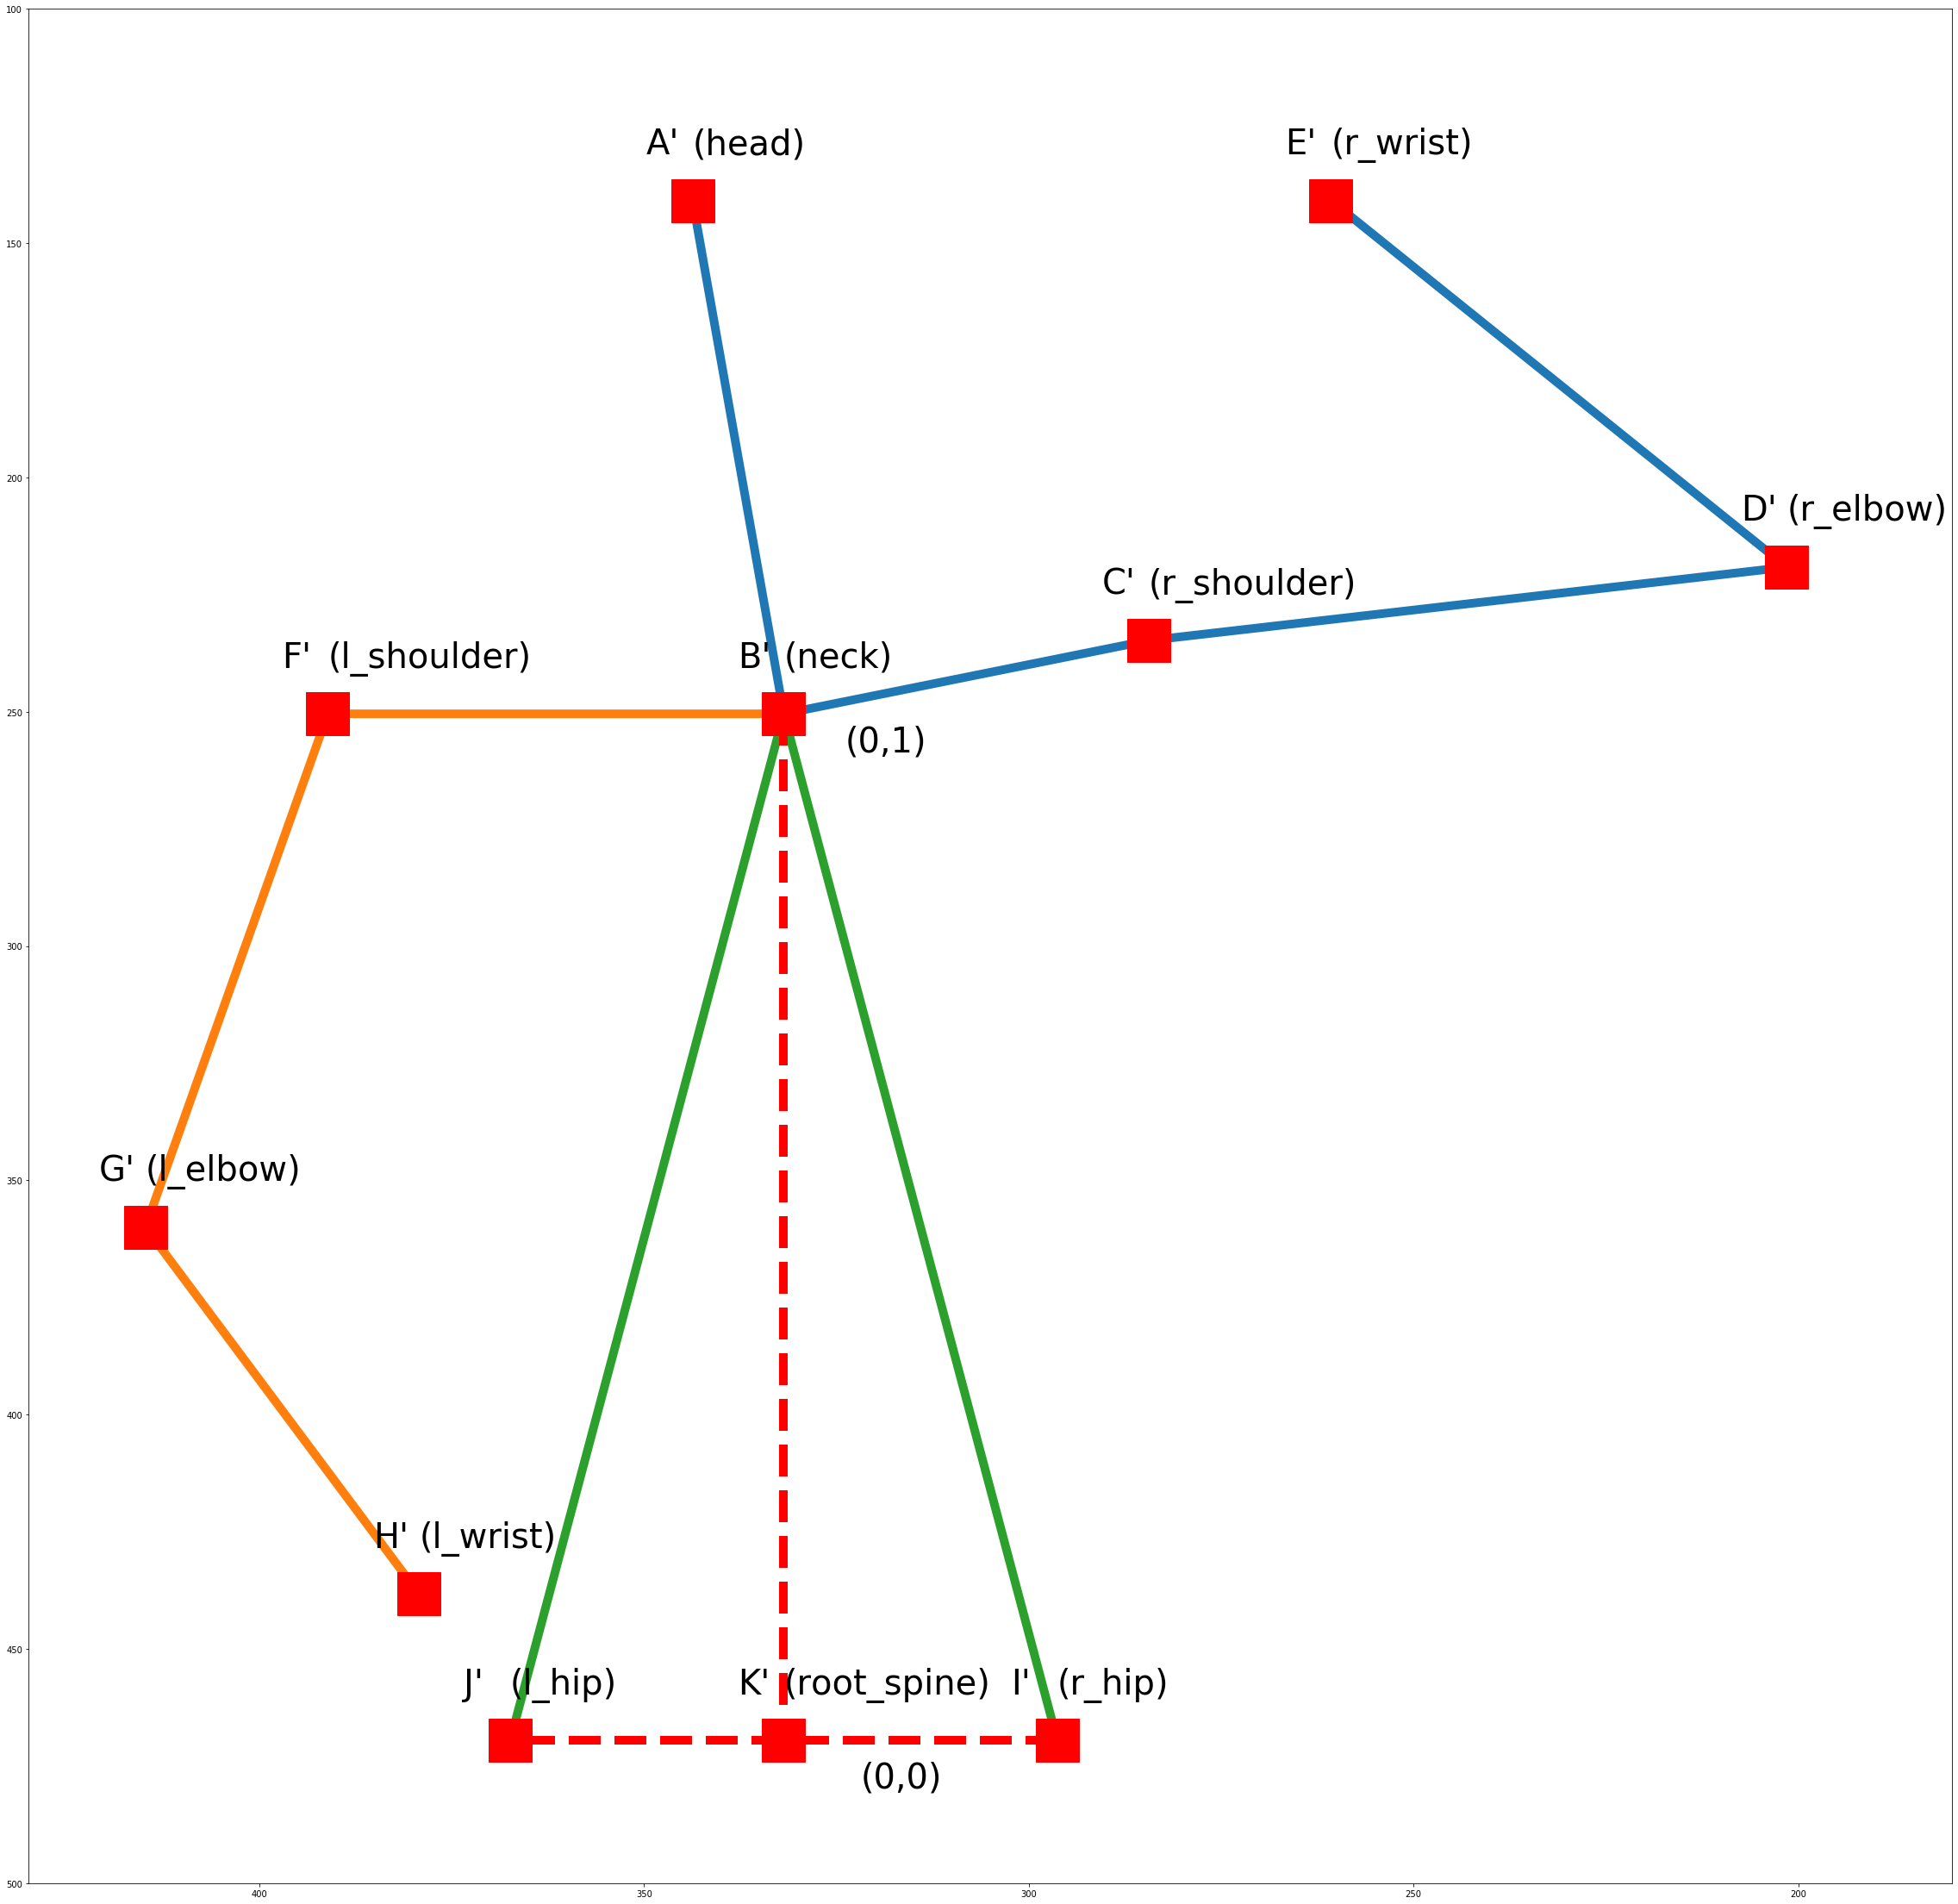

In [40]:
X = dataset[:, 0:20].astype(float)
a = list(X[0])
print(a)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = a[i]*720
        joints_x.append(a[i])
        
    else:
        a[i] = a[i]*640
        joints_y.append(a[i])
print(a)
joints_y.append((a[16]+a[18])/2)
joints_x.append((a[17]+a[19])/2)
a.append((a[16]+a[18])/2)
a.append((a[17]+a[19])/2)
print(a)
name = ['head', 'neck', 'r_shoulder', 'r_elbow','r_wrist','l_shoulder','l_elbow', 'l_wrist', 'r_hip', 'l_hip', 'root_spine']
name_1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
name_2 = ["A'", "B'", "C'", "D'", "E'", "F'", "G'", "H'", "I'", "J'", "K'"]
m_x = (joints_x[8] + joints_x[9])/2
m_y = (joints_y[8] + joints_y[9])/2
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False,
                             sharey=True, figsize=(40,40))
#fig.suptitle('Skeleton', size=80)
#axes.scatter(joints_x, joints_y)
axes.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]],linewidth=10)
axes.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]],linewidth=10)
axes.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]],linewidth=10)
axes.plot([a[16],a[20],a[18]], [a[17],a[21],a[19]],'r--', linewidth=10)
axes.plot([a[2],a[20]], [a[3],a[21]],'r--', linewidth=10)
#axes.plot.()

axes.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18], a[20]],
          [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19], a[21]], 'rs', markersize=50)
for i, txt in enumerate(name):
    axes.text(joints_y[i], joints_x[i]-10, '('+txt+')', fontsize=40)
for i, txt in enumerate(name_2):
    axes.text(joints_y[i]+6, joints_x[i]-10, txt, fontsize=40)

axes.text(joints_y[1]-8, joints_x[1]+8, "(0,1)", fontsize=40)
axes.text(joints_y[10]-10, joints_x[10]+10, "(0,0)", fontsize=40)
axes.axis([430, 180, 500, 100]) #axes.axis([640, 0, 720, 0])
plt.show()


[0.537037037, 0.1956521739, 0.5185185185, 0.347826087, 0.44444444439999997, 0.32608695649999997, 0.3148148148, 0.3043478261, 0.40740740740000003, 0.1956521739, 0.6111111111, 0.347826087, 0.6481481481, 0.5, 0.5925925926, 0.6086956522, 0.46296296299999995, 0.6521739129999999, 0.5740740741, 0.6521739129999999]
[343.70370368000005, 140.869565208, 331.85185184, 250.43478264, 284.444444416, 234.78260867999998, 201.481481472, 219.130434792, 260.740740736, 140.869565208, 391.11111110400003, 250.43478264, 414.81481478399996, 360.0, 379.259259264, 438.260869584, 296.29629631999995, 469.56521735999996, 367.407407424, 469.56521735999996]
[343.70370368000005, 140.869565208, 331.85185184, 250.43478264, 284.444444416, 234.78260867999998, 201.481481472, 219.130434792, 260.740740736, 140.869565208, 391.11111110400003, 250.43478264, 414.81481478399996, 360.0, 379.259259264, 438.260869584, 296.29629631999995, 469.56521735999996, 367.407407424, 469.56521735999996]


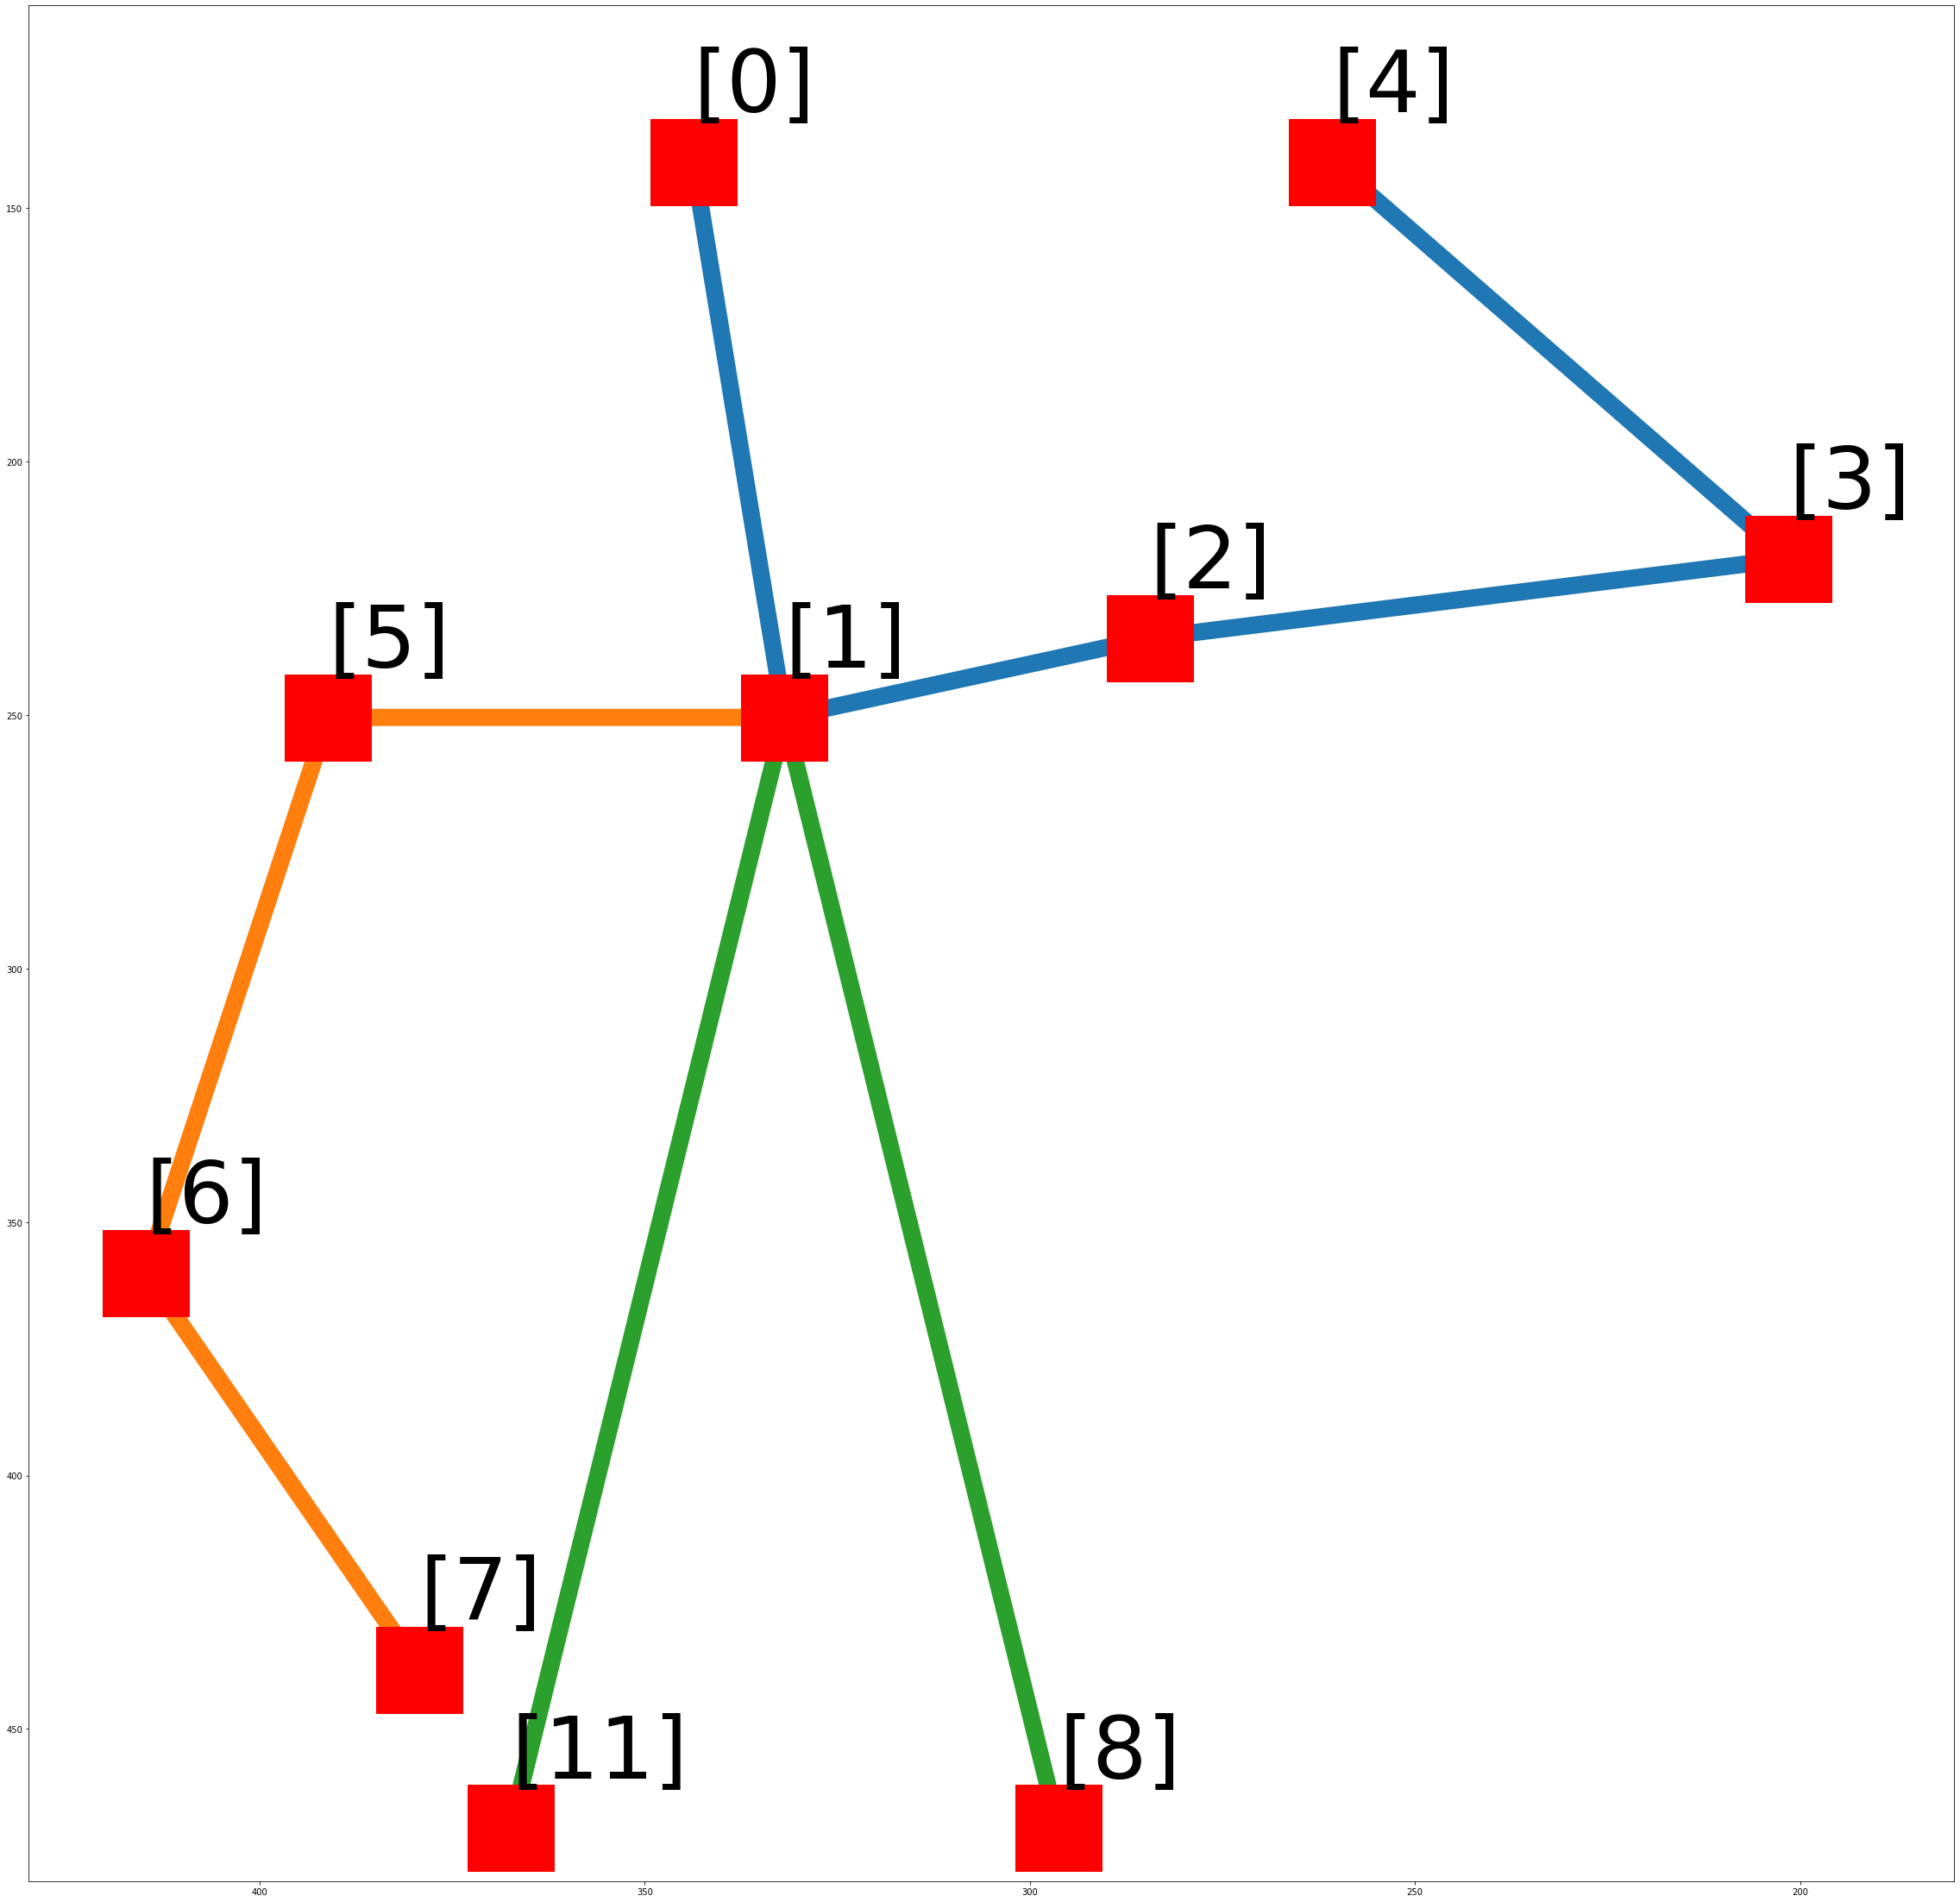

In [55]:
X = dataset[:, 0:20].astype(float)
a = list(X[0])
print(a)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = a[i]*720
        joints_x.append(a[i])
        
    else:
        a[i] = a[i]*640
        joints_y.append(a[i])
print(a)
joints_y.append((a[16]+a[18])/2)
joints_x.append((a[17]+a[19])/2)
#a.append((a[16]+a[18])/2)
#a.append((a[17]+a[19])/2)
print(a)
name = ['head', 'neck', 'r_shoulder', 'r_elbow','r_wrist','l_shoulder','l_elbow', 'l_wrist', 'r_hip', 'l_hip', 'root_spine']
name_1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
name_2 = ["A'", "B'", "C'", "D'", "E'", "F'", "G'", "H'", "I'", "J'", "K'"]
name_3 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '11']
m_x = (joints_x[8] + joints_x[9])/2
m_y = (joints_y[8] + joints_y[9])/2
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False,
                             sharey=True, figsize=(40,40))
#fig.suptitle('Skeleton', size=80)
#axes.scatter(joints_x, joints_y)
axes.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]],linewidth=20)
axes.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]],linewidth=20)
axes.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]],linewidth=20)
# axes.plot([a[16],a[20],a[18]], [a[17],a[21],a[19]],'r--', linewidth=10)
# axes.plot([a[2],a[20]], [a[3],a[21]],'r--', linewidth=10)
#axes.plot.()

axes.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]],
          [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', markersize=100)
for i, txt in enumerate(name_3):
    axes.text(joints_y[i], joints_x[i]-10, "["+txt+"]", fontsize=100)

# axes.text(joints_y[1]-8, joints_x[1]+8, "(0,1)", fontsize=40)
# axes.text(joints_y[10]-10, joints_x[10]+10, "(0,0)", fontsize=40)
axes.axis([430, 180, 480, 110]) #axes.axis([640, 0, 720, 0])
plt.show()


In [51]:
print(dpp.pose_normalization(X[0]))
print(X)
print(X_pp)
print(Y)

[0.6111111111611112, 0.3333333334793651, 0.38888888883888895, 0.28571428571428564, 0.0, 0.23809523816825393, 0.2777777778277779, 0.0, 0.8888888889888892, 0.3333333334793651, 1.0, 0.6666666667396826, 0.8333333334833334, 0.9047619049079365, 0.44444444464444427, 1.0, 0.7777777779777778, 1.0]
[[3.44e+02 1.41e+02 3.32e+02 ... 4.70e+02 3.67e+02 4.70e+02]
 [5.37e-01 1.96e-01 5.19e-01 ... 6.30e-01 5.74e-01 6.52e-01]
 [5.37e-01 1.96e-01 5.19e-01 ... 6.52e-01 5.74e-01 6.52e-01]
 ...
 [5.88e-01 9.24e-02 5.79e-01 ... 6.96e-01 6.62e-01 7.07e-01]
 [5.88e-01 9.24e-02 5.79e-01 ... 7.01e-01 6.57e-01 7.01e-01]
 [5.93e-01 9.24e-02 5.79e-01 ... 6.96e-01 6.57e-01 7.07e-01]]
[[0.61 0.33 0.39 ... 1.   0.78 1.  ]
 [0.61 0.33 0.39 ... 0.95 0.78 1.  ]
 [0.61 0.33 0.33 ... 1.   0.78 1.  ]
 ...
 [0.43 0.04 0.   ... 0.98 0.77 1.  ]
 [0.42 0.04 0.   ... 1.   0.74 1.  ]
 [0.42 0.05 0.   ... 0.98 0.73 1.  ]]
[ 0.  0.  0. ... 15. 15. 15.]


In [52]:
print(X[:,19])

[469.57   0.65   0.65 ...   0.71   0.7    0.71]


In [53]:
encoder = LabelEncoder()
encoder_Y = encoder.fit_transform(Y)
matrix_Y = np_utils.to_categorical(encoder_Y)

In [54]:
print(X_pp.shape)
print(Y.shape)
print(matrix_Y.shape)
print(matrix_Y)

(12800, 18)
(12800,)
(12800, 16)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [55]:
print(Y[0], ": ", encoder_Y[0])
print(Y[800], ": ", encoder_Y[800])
print(Y[1600], ": ", encoder_Y[1600])
print(Y[2400], ": ", encoder_Y[2400])
print(Y[3200], ": ", encoder_Y[3200])
print(Y[4000], ": ", encoder_Y[4000])
print(Y[4800], ": ", encoder_Y[4800])
print(Y[5600], ": ", encoder_Y[5600])
print(Y[6400], ": ", encoder_Y[6400])
print(Y[7200], ": ", encoder_Y[7200])
print(Y[8000], ": ", encoder_Y[8000])
print(Y[8800], ": ", encoder_Y[8800])
print(Y[9600], ": ", encoder_Y[9600])
print(Y[10400], ": ", encoder_Y[10400])
print(Y[11200], ": ", encoder_Y[11200])
print(Y[12000], ": ", encoder_Y[12000])

0.0 :  0
1.0 :  1
2.0 :  2
3.0 :  3
4.0 :  4
5.0 :  5
6.0 :  6
7.0 :  7
8.0 :  8
9.0 :  9
10.0 :  10
11.0 :  11
12.0 :  12
13.0 :  13
14.0 :  14
15.0 :  15


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pp, matrix_Y, test_size=0.5)  #random_state=42

In [57]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-44-d06dcff44ad8> in <module>
----> 1 his.loss_plot('epoch')

<ipython-input-35-ae441bd5a7b4> in loss_plot(self, loss_type)
     19 
     20     def loss_plot(self, loss_type):
---> 21         iters = range(len(self.losses[loss_type]))
     22         plt.figure()
     23         # acc

AttributeError: 'LossHistory' object has no attribute 'losses'

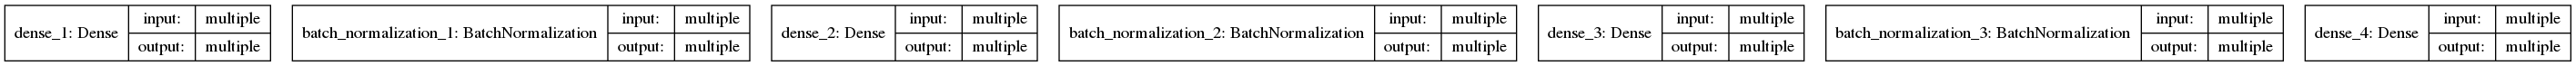

In [58]:
model = Sequential()
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=16, activation='softmax'))
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['acc'])
plot_model(model, to_file='model.png', show_shapes=True)

In [59]:
checkpoint = ModelCheckpoint('sign_language_16_test.h5', monitor='val_acc', verbose=1, mode = 'max', save_best_only=True, save_weights_only=False, period=1)
history = model.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks = [checkpoint])
model.save('sign_language_16_test.h5')

Train on 6400 samples, validate on 6400 samples
Epoch 1/50
6400/6400 [==============================] - 1s 143us/step - loss: 1.9308 - acc: 0.4800 - val_loss: 2.6413 - val_acc: 0.1773

Epoch 00001: val_acc improved from -inf to 0.17734, saving model to sign_language_16_test.h5
Epoch 2/50
6400/6400 [==============================] - 0s 62us/step - loss: 1.2141 - acc: 0.8413 - val_loss: 1.8212 - val_acc: 0.6322

Epoch 00002: val_acc improved from 0.17734 to 0.63219, saving model to sign_language_16_test.h5
Epoch 3/50
6400/6400 [==============================] - 0s 62us/step - loss: 0.9410 - acc: 0.9325 - val_loss: 0.9919 - val_acc: 0.9608

Epoch 00003: val_acc improved from 0.63219 to 0.96078, saving model to sign_language_16_test.h5
Epoch 4/50
6400/6400 [==============================] - 0s 62us/step - loss: 0.7620 - acc: 0.9608 - val_loss: 0.6579 - val_acc: 0.9672

Epoch 00004: val_acc improved from 0.96078 to 0.96719, saving model to sign_language_16_test.h5
Epoch 5/50
6400/6400 [====


Epoch 00038: val_acc did not improve from 0.99906
Epoch 39/50
6400/6400 [==============================] - 1s 86us/step - loss: 0.0124 - acc: 0.9997 - val_loss: 0.0093 - val_acc: 0.9989

Epoch 00039: val_acc did not improve from 0.99906
Epoch 40/50
6400/6400 [==============================] - 1s 94us/step - loss: 0.0123 - acc: 0.9992 - val_loss: 0.0095 - val_acc: 0.9989

Epoch 00040: val_acc did not improve from 0.99906
Epoch 41/50
6400/6400 [==============================] - 1s 97us/step - loss: 0.0109 - acc: 0.9994 - val_loss: 0.0083 - val_acc: 0.9989

Epoch 00041: val_acc did not improve from 0.99906
Epoch 42/50
6400/6400 [==============================] - 1s 95us/step - loss: 0.0106 - acc: 0.9991 - val_loss: 0.0077 - val_acc: 0.9989

Epoch 00042: val_acc did not improve from 0.99906
Epoch 43/50
6400/6400 [==============================] - 1s 99us/step - loss: 0.0090 - acc: 0.9998 - val_loss: 0.0078 - val_acc: 0.9987

Epoch 00043: val_acc did not improve from 0.99906
Epoch 44/50
64

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


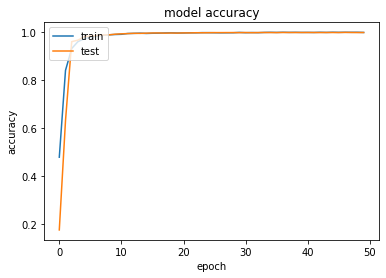

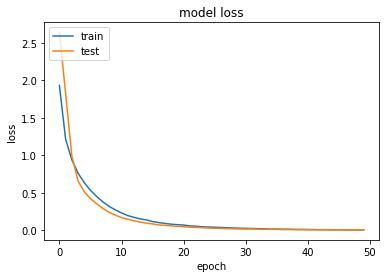

In [61]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
model = load_model('sign_language_16_test.h5')

In [63]:
Y_pred = model.predict(X_test)

In [39]:
print(X_test)

[[0.39 0.01 0.08 ... 0.97 0.68 0.94]
 [0.62 0.06 0.23 ... 1.   0.85 1.  ]
 [0.5  0.   0.17 ... 1.   0.75 1.  ]
 ...
 [0.48 0.06 0.25 ... 1.   0.66 0.96]
 [0.54 0.05 0.17 ... 1.   0.78 0.95]
 [0.5  0.06 0.21 ... 1.   0.64 0.94]]


In [20]:
print(Y_pred)

[[1.76754002e-05 2.59567719e-06 7.59814782e-07 ... 1.18447115e-05
  4.17149422e-05 4.16668699e-05]
 [9.98846299e-05 1.56716951e-07 4.69774164e-07 ... 8.37739026e-06
  6.63224853e-07 6.91431705e-06]
 [1.03770117e-06 9.99646068e-01 9.77183663e-06 ... 5.22248483e-05
  5.37513279e-06 4.41233387e-05]
 ...
 [5.40814690e-05 6.90541583e-06 1.55650162e-06 ... 6.19760030e-08
  8.92607261e-07 1.08460326e-05]
 [9.85275051e-07 9.98864055e-01 2.91086835e-05 ... 4.55405476e-04
  1.64951471e-05 8.71779321e-06]
 [8.80247626e-06 4.57604210e-06 2.36045944e-05 ... 1.27489484e-05
  9.28944655e-09 1.49753168e-05]]


In [21]:
print(Y_pred.shape)

(2560, 16)


In [22]:
print(Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize = 30)
    plt.yticks(tick_marks, classes, fontsize = 30)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 25)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 25)
    plt.xlabel('Predicted label', fontsize = 25)

In [65]:
cfm = confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(Y_pred, axis=1))

In [66]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[381   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 412   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 394   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0 401   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 406   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 396   0   0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0 403   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 382   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 407   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 390   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0 414   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 379   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 395   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 405   0   0]
 [  0   0   0   2   0 

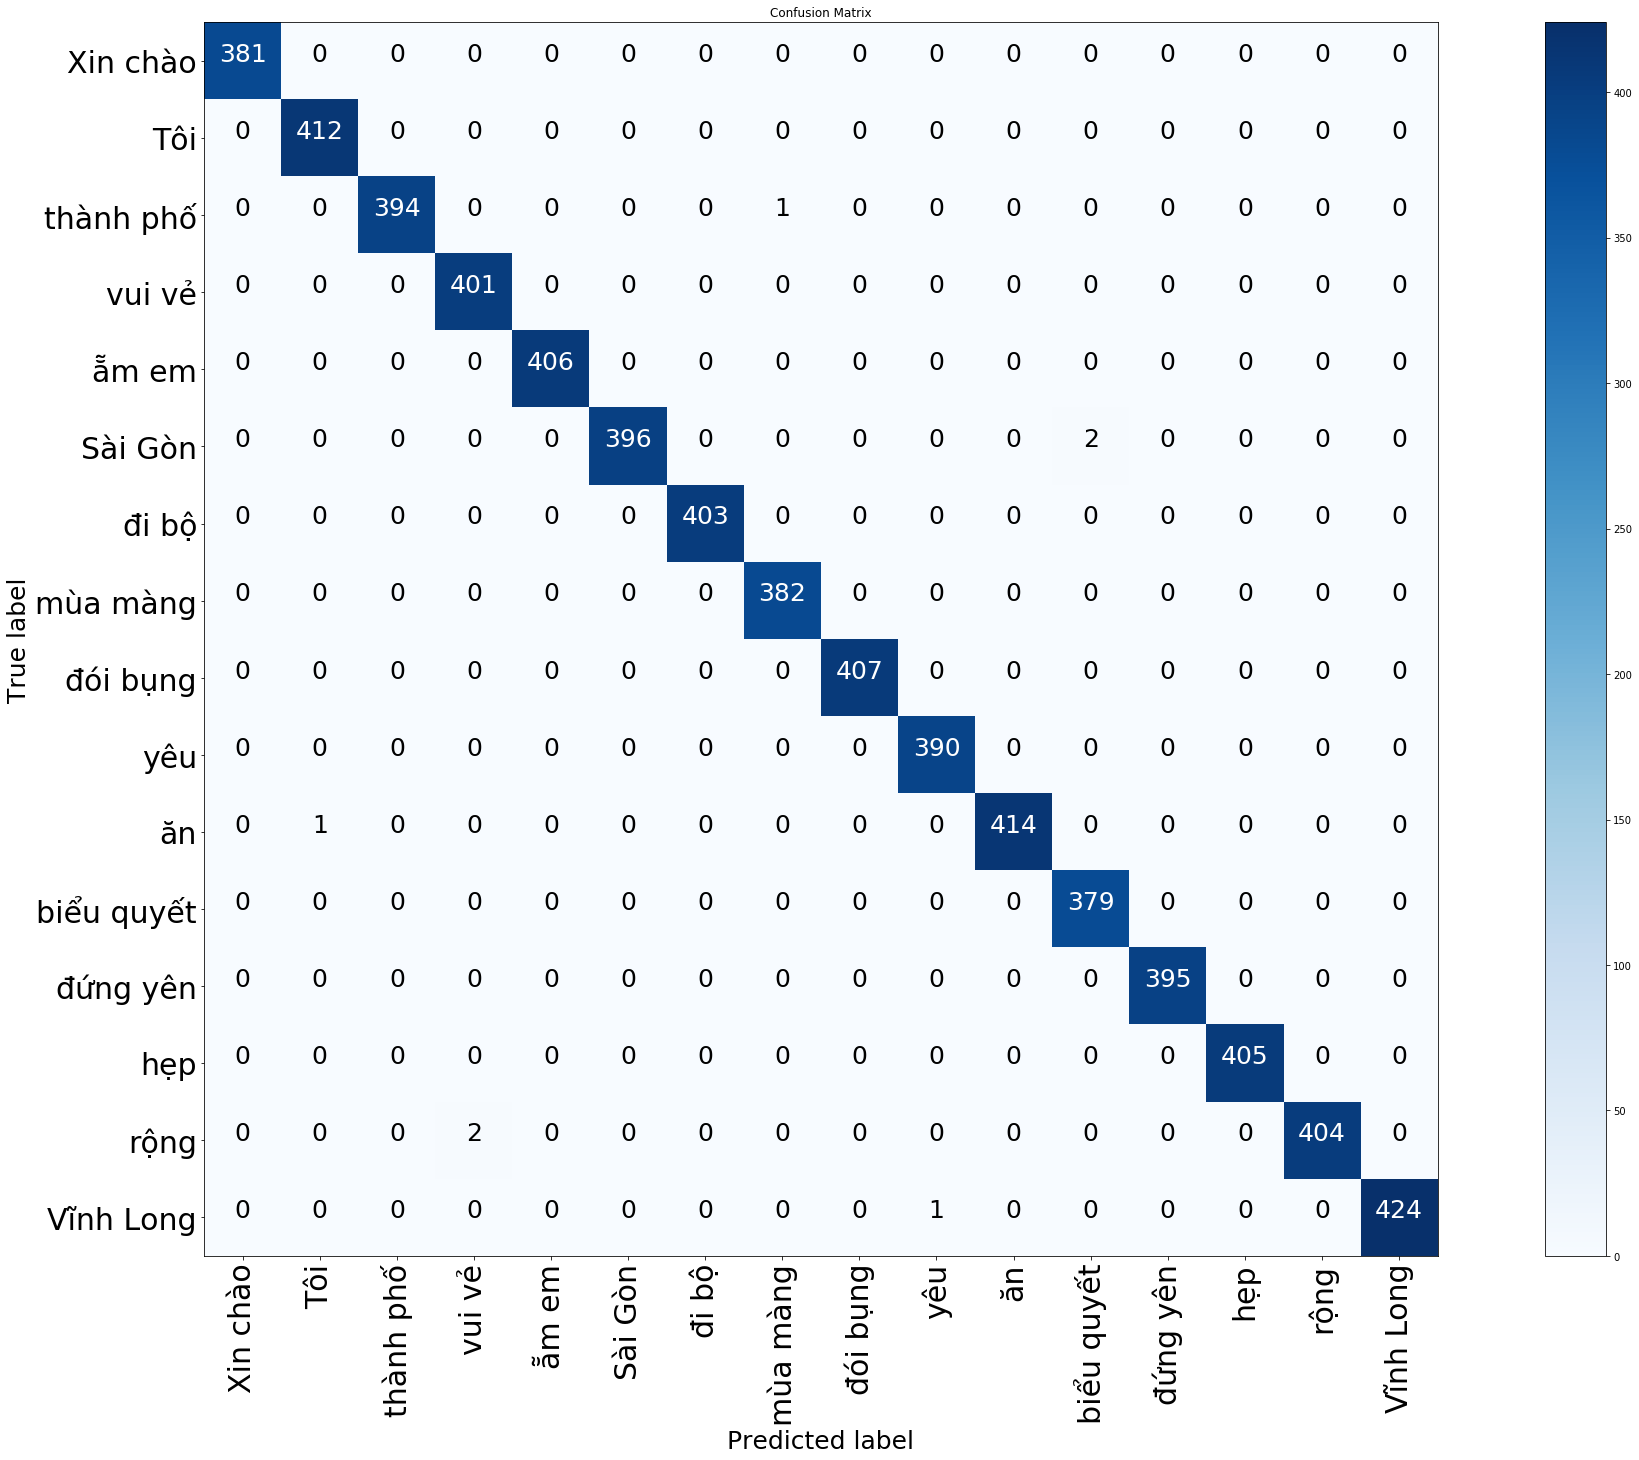

In [67]:
plt.figure(figsize=(30,20))
class_names = ['Xin chào', 'Tôi', 'thành phố', 'vui vẻ', 'ẵm em', 'Sài Gòn', 
               'đi bộ', 'mùa màng', 'đói bụng', 'yêu', 'ăn', 'biểu quyết', 
               'đứng yên', 'hẹp', 'rộng', 'Vĩnh Long']
plot_confusion_matrix(cfm, classes=class_names, title='Confusion Matrix')
plt.show()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pp, matrix_Y, test_size=0.5)

In [7]:
model = load_model('sign_language_16_test.h5')
Y_pred = model.predict(X_test)

In [18]:
print(Y_pred)

[[1.77017432e-06 3.04516084e-06 6.29508795e-05 ... 1.04193576e-04
  9.99652863e-01 1.59954868e-06]
 [6.31410967e-06 8.18462740e-06 2.68270469e-05 ... 1.10982495e-04
  8.64739746e-09 2.66569532e-06]
 [1.87454512e-04 7.53061101e-07 2.25264957e-05 ... 2.77808522e-05
  2.66659554e-05 2.61828905e-06]
 ...
 [1.25825659e-06 2.47641165e-05 1.93592696e-05 ... 6.16290117e-06
  2.94854017e-05 4.41152042e-05]
 [1.71835331e-04 2.31213704e-07 1.09209086e-05 ... 1.56128954e-05
  6.87733382e-06 1.90260062e-06]
 [9.57213615e-07 2.51408619e-06 1.26425721e-06 ... 9.99866724e-01
  9.96401195e-06 6.55903918e-08]]


In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuGn):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 4.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                    3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 
                    4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 
                    5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 
                    6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 
                    7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 
                    8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
                    9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
                    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
                    12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                    13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
                    14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
                    15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 
                    ])
y_pred = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                    3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 
                    4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 
                    5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 
                    6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 
                    7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 
                    8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
                    9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
                    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
                    12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                    13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
                    14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
                    15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 
                    ])
cnf_matrix = confusion_matrix(y_true, y_pred)

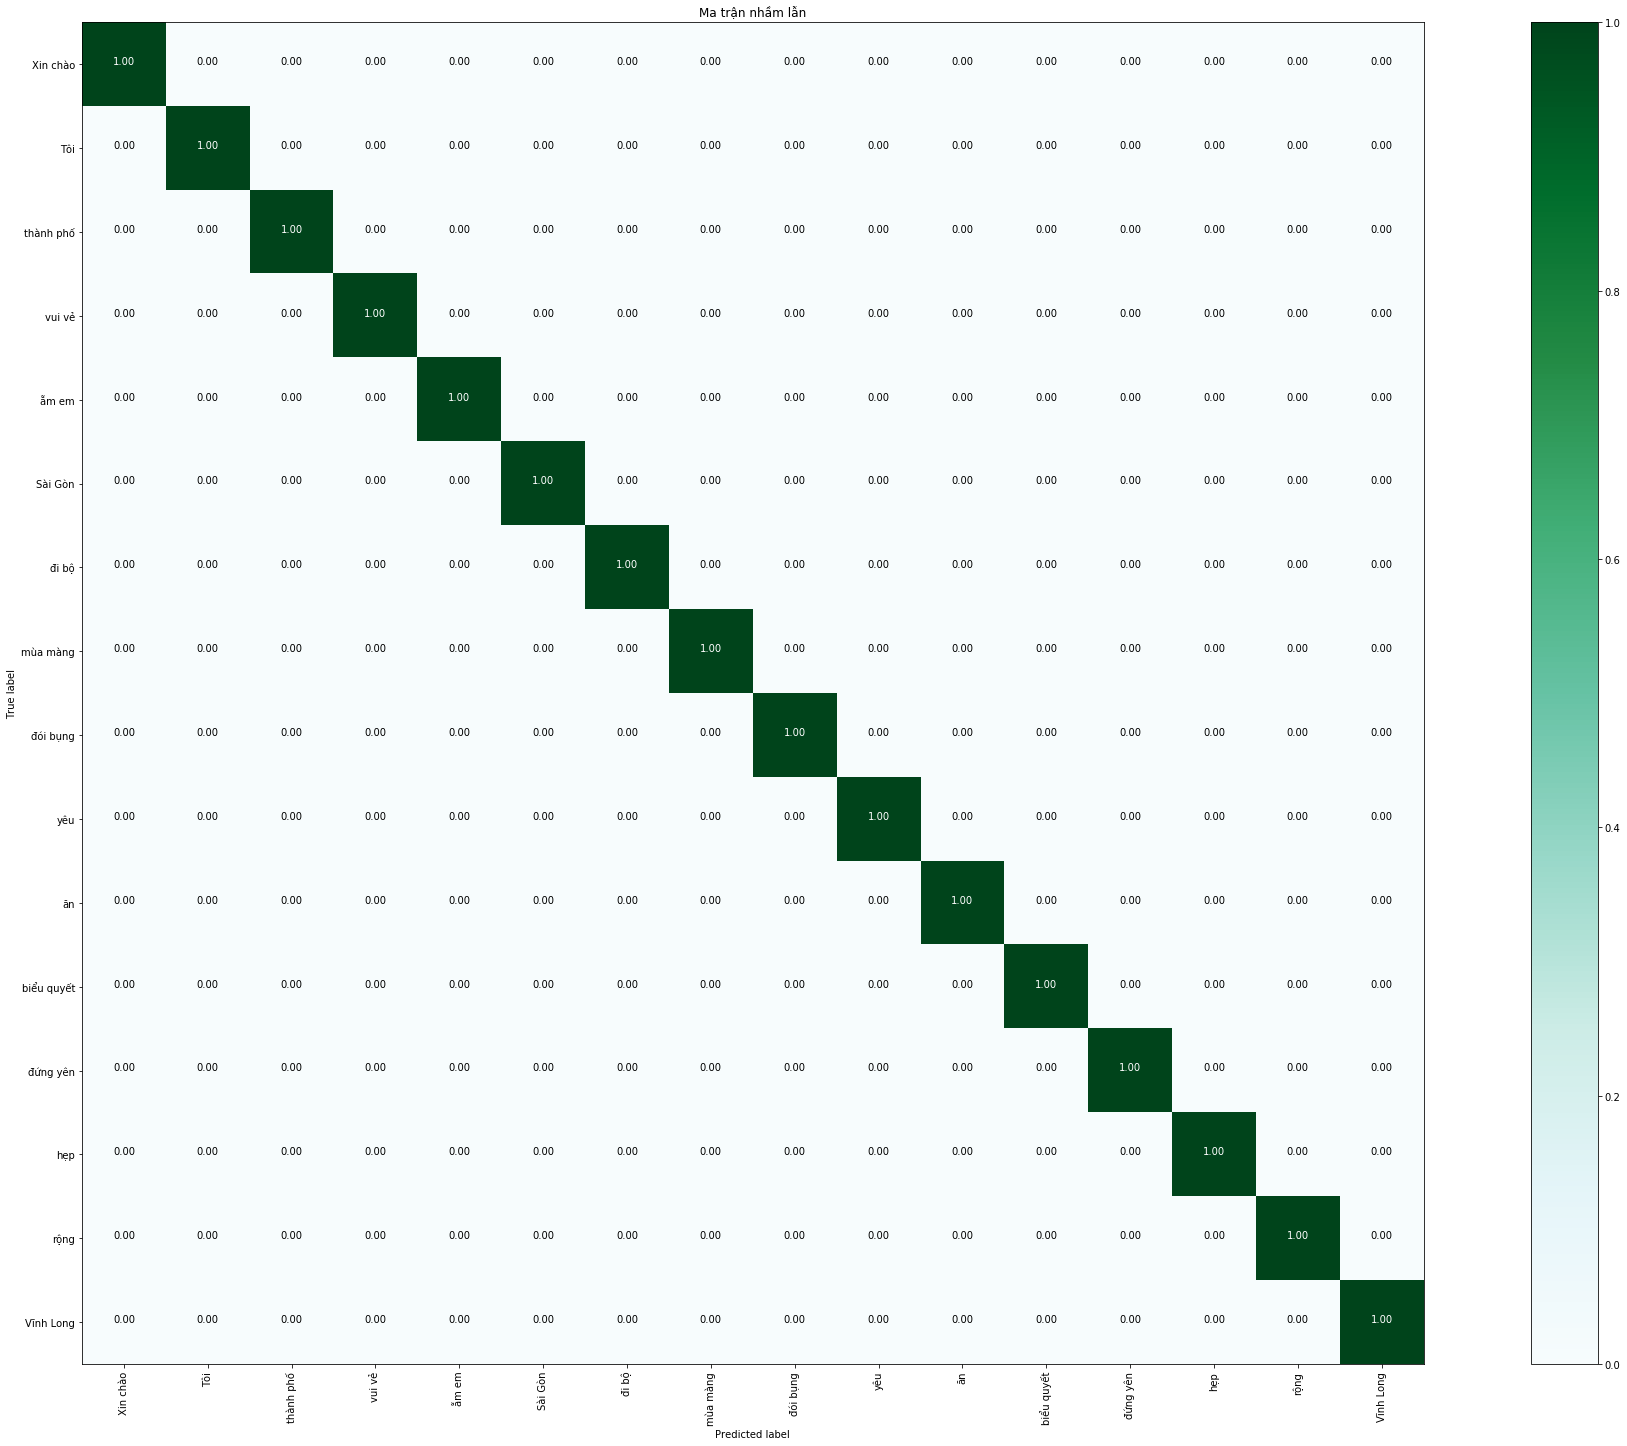

In [21]:
class_names = ['Xin chào', 'Tôi', 'thành phố', 'vui vẻ', 'ẵm em', 'Sài Gòn', 
               'đi bộ', 'mùa màng', 'đói bụng', 'yêu', 'ăn', 'biểu quyết', 
               'đứng yên', 'hẹp', 'rộng', 'Vĩnh Long']
#                0      1      2       3                4           5          6         7          8           9          
plt.figure(figsize=(30,20))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Ma trận nhầm lẫn')

plt.show()